In [90]:
import imp

import sys
import matplotlib.pyplot as plt
from collections import OrderedDict
from collections import defaultdict
import numpy as np
from cycler import cycler
import matplotlib.colors as colors
import matplotlib.cm as cm
import random
import pandas as pd

from collections import Counter

from epiweeks import Week,Year

import joypy

In [5]:
case_defs = imp.load_source("case_definitions","utils/case_definitions.py")
time = imp.load_source("time_functions", "utils/time_functions.py")

data_parsing = imp.load_source("data_parsing", "utils/data_parsing.py")


In [12]:
week = "2020-04-24"
current_day = time.make_current_week(week)
metadata_file = "/Users/s1743989/VirusEvolution Dropbox/Group/Coronavirus_projects/UK_project/2020-04-24_3/cog_gisaid.with_traits.with_updated_lineages.csv"

intro_bigs, intro_smalls, intro_alls, count, intro_countries, intro_object_dict, omitted, taxa_list, new_acctrans_to_lineage, taxon_dictionary, most_recent_sample, introduction_int_list, unclear_taxa = data_parsing.make_objects(current_day,metadata_file)



In [22]:
adm2_list = []

for i in taxa_list:
    if i.adm2 != "":
        adm2_list.append(i.adm2)
    
adm2_counts = Counter(adm2_list)


top_ten_locs = adm2_counts.most_common(10)

In [23]:
print(top_ten_locs)

[('GREATER LONDON', 1136), ('WALES', 884), ('ESSEX', 777), ('SOUTH YORKSHIRE', 481), ('HERTFORDSHIRE', 478), ('EDINBURGH', 383), ('CAMBRIDGESHIRE', 374), ('NOTTINGHAM', 290), ('BEDFORDSHIRE', 254), ('GLASGOW', 233)]


In [26]:
biggest_locs = []

for i in top_ten_locs:
    biggest_locs.append(i[0])
    
print(biggest_locs)

['GREATER LONDON', 'WALES', 'ESSEX', 'SOUTH YORKSHIRE', 'HERTFORDSHIRE', 'EDINBURGH', 'CAMBRIDGESHIRE', 'NOTTINGHAM', 'BEDFORDSHIRE', 'GLASGOW']


In [28]:
loc_to_taxa = defaultdict(list)

for tax in taxa_list:
    if tax.adm2 in biggest_locs:
        loc_to_taxa[tax.adm2].append(tax)

In [30]:
print(loc_to_taxa.keys())

dict_keys(['NOTTINGHAM', 'SOUTH YORKSHIRE', 'EDINBURGH', 'HERTFORDSHIRE', 'GREATER LONDON', 'ESSEX', 'CAMBRIDGESHIRE', 'BEDFORDSHIRE', 'GLASGOW', 'WALES'])


In [57]:
loc_to_taxa_binned = defaultdict(dict)
loc_to_binned_lineages = defaultdict(dict)

for location, taxon_list in loc_to_taxa.items():
    tax_binned_by_week = defaultdict(list)
    lin_counts = {}
    lin_sets = defaultdict(set)
    for tax in taxon_list:
        if type(tax.epiweek) != str:
            tax_binned_by_week[tax.epiweek].append(tax)
            lin_sets[tax.epiweek].add(tax.introduction)
        
    for i,v in lin_sets.items():
        lin_counts[i] = len(v)
    
    loc_to_taxa_binned[location] = tax_binned_by_week
    loc_to_binned_lineages[location] = lin_counts
    

In [61]:
weeks_present = set()

for i in loc_to_binned_lineages.values():
    for j in i.keys():
        weeks_present.add(j)

In [64]:
in_order_weeks = (sorted(weeks_present))

In [72]:
for week in in_order_weeks:
    for i,b in loc_to_binned_lineages.items():
        if week not in b.keys():
            b[week] = 0
            

In [73]:
for week in in_order_weeks:
    for i,b in loc_to_binned_lineages.items():
        print(i, week, b[week])

NOTTINGHAM 202007 0
SOUTH YORKSHIRE 202007 0
EDINBURGH 202007 0
HERTFORDSHIRE 202007 0
GREATER LONDON 202007 8
ESSEX 202007 0
CAMBRIDGESHIRE 202007 0
BEDFORDSHIRE 202007 0
GLASGOW 202007 0
WALES 202007 0
NOTTINGHAM 202008 0
SOUTH YORKSHIRE 202008 0
EDINBURGH 202008 0
HERTFORDSHIRE 202008 0
GREATER LONDON 202008 5
ESSEX 202008 0
CAMBRIDGESHIRE 202008 0
BEDFORDSHIRE 202008 0
GLASGOW 202008 0
WALES 202008 0
NOTTINGHAM 202009 0
SOUTH YORKSHIRE 202009 11
EDINBURGH 202009 0
HERTFORDSHIRE 202009 4
GREATER LONDON 202009 24
ESSEX 202009 1
CAMBRIDGESHIRE 202009 5
BEDFORDSHIRE 202009 0
GLASGOW 202009 0
WALES 202009 1
NOTTINGHAM 202010 2
SOUTH YORKSHIRE 202010 15
EDINBURGH 202010 4
HERTFORDSHIRE 202010 4
GREATER LONDON 202010 89
ESSEX 202010 5
CAMBRIDGESHIRE 202010 13
BEDFORDSHIRE 202010 2
GLASGOW 202010 4
WALES 202010 5
NOTTINGHAM 202011 17
SOUTH YORKSHIRE 202011 6
EDINBURGH 202011 22
HERTFORDSHIRE 202011 14
GREATER LONDON 202011 247
ESSEX 202011 27
CAMBRIDGESHIRE 202011 13
BEDFORDSHIRE 202011 6


In [104]:
test = loc_to_binned_lineages["GLASGOW"]
print(test)

{Week(2020, 14, CDC): 32, Week(2020, 15, CDC): 17, Week(2020, 13, CDC): 28, Week(2020, 12, CDC): 28, Week(2020, 11, CDC): 23, Week(2020, 10, CDC): 4, Week(2020, 7, CDC): 0, Week(2020, 8, CDC): 0, Week(2020, 9, CDC): 0, Week(2020, 16, CDC): 0, Week(2020, 17, CDC): 0}


In [105]:
y_list = []
for i in in_order_weeks:
    y_list.append(test[i])


In [106]:
x = []

for i in in_order_weeks:
    x.append(i.startdate())

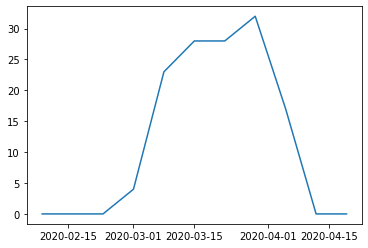

In [107]:
plt.plot(x,y_list)
plt.show()

In [130]:
df_dict = defaultdict(list)
other_dict = defaultdict(list)

for wk in in_order_weeks:
    df_dict["Week_commencing"].append(wk.startdate())
  
    for i,dt in loc_to_binned_lineages.items():
        df_dict[i].append(dt[wk])
        other_dict[i].append(dt[wk])
        
print(df_dict)

defaultdict(<class 'list'>, {'Week_commencing': [datetime.date(2020, 2, 9), datetime.date(2020, 2, 16), datetime.date(2020, 2, 23), datetime.date(2020, 3, 1), datetime.date(2020, 3, 8), datetime.date(2020, 3, 15), datetime.date(2020, 3, 22), datetime.date(2020, 3, 29), datetime.date(2020, 4, 5), datetime.date(2020, 4, 12), datetime.date(2020, 4, 19)], 'NOTTINGHAM': [0, 0, 0, 2, 17, 32, 48, 68, 22, 0, 0], 'SOUTH YORKSHIRE': [0, 0, 11, 15, 6, 25, 91, 88, 12, 6, 0], 'EDINBURGH': [0, 0, 0, 4, 22, 22, 40, 54, 46, 40, 15], 'HERTFORDSHIRE': [0, 0, 4, 4, 14, 34, 54, 161, 66, 23, 0], 'GREATER LONDON': [8, 5, 24, 89, 247, 119, 227, 107, 6, 29, 0], 'ESSEX': [0, 0, 1, 5, 27, 55, 80, 198, 86, 14, 0], 'CAMBRIDGESHIRE': [0, 0, 5, 13, 13, 29, 47, 69, 54, 38, 0], 'BEDFORDSHIRE': [0, 0, 0, 2, 6, 28, 25, 71, 47, 6, 0], 'GLASGOW': [0, 0, 0, 4, 23, 28, 28, 32, 17, 0, 0], 'WALES': [0, 0, 1, 5, 9, 36, 131, 180, 57, 0, 0]})


In [91]:
df = pd.DataFrame(df_dict)

In [92]:
df

,Week_commencing,NOTTINGHAM,SOUTH YORKSHIRE,EDINBURGH,HERTFORDSHIRE,GREATER LONDON,ESSEX,CAMBRIDGESHIRE,BEDFORDSHIRE,GLASGOW,WALES
0,2020-02-09,0,0,0,0,8,0,0,0,0,0
1,2020-02-16,0,0,0,0,5,0,0,0,0,0
2,2020-02-23,0,11,0,4,24,1,5,0,0,1
3,2020-03-01,2,15,4,4,89,5,13,2,4,5
4,2020-03-08,17,6,22,14,247,27,13,6,23,9
5,2020-03-15,32,25,22,34,119,55,29,28,28,36
6,2020-03-22,48,91,40,54,227,80,47,25,28,131
7,2020-03-29,68,88,54,161,107,198,69,71,32,180
8,2020-04-05,22,12,46,66,6,86,54,47,17,57
9,2020-04-12,0,6,40,23,29,14,38,6,0,0


In [99]:
x = df["Week_commencing"]
y1 = df["NOTTINGHAM"]
y2 = df["EDINBURGH"]

for y, count_list in y_dict.items():
    for index, number in enumerate(count_list):
        totals[str(index)] += number

    y = np.vstack(list(y_dict.values()))

y = np.vstack([y1,y2])

labs = ["Nottingham", "Edinburgh"]

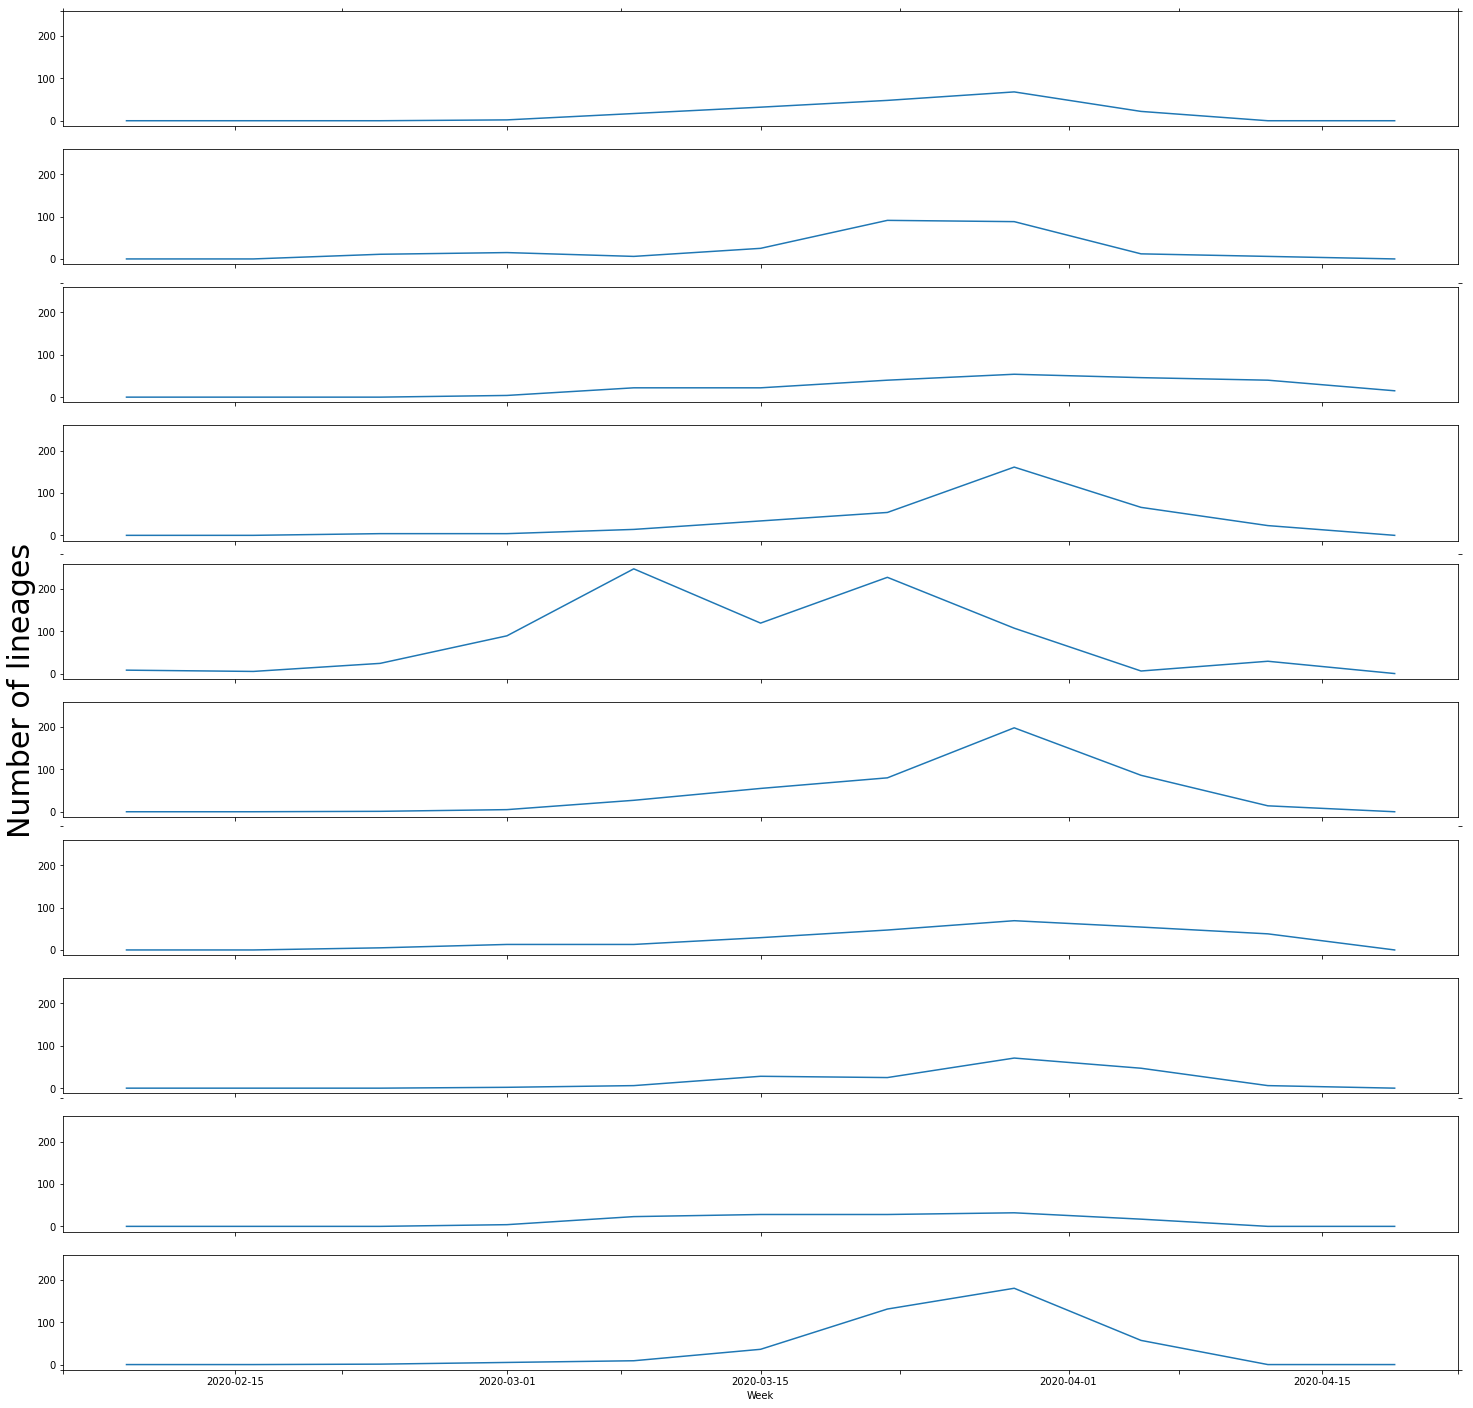

In [165]:
y_dict = defaultdict(list)
labs = []
for col in df.iteritems():
    if col[0] != "Week_commencing":
        labs.append(col[0])
        y_dict[col[0]] = col[1:]        

fig, axs = plt.subplots(10, sharex=True, sharey=True, figsize=(25,25))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

x = list(df["Week_commencing"])
# print(x)
count = 0
for key,i in other_dict.items():
    y = list(i)
    
    axs[count].plot(x,y, label=key)
    count += 1

plt.xlabel("Week")
plt.ylabel("Number of lineages", fontsize=30)

ax.yaxis.set_label_coords(10,10)

plt.show()

/Users/s1743989/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
/Users/s1743989/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/s1743989/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/s1743989/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The ro

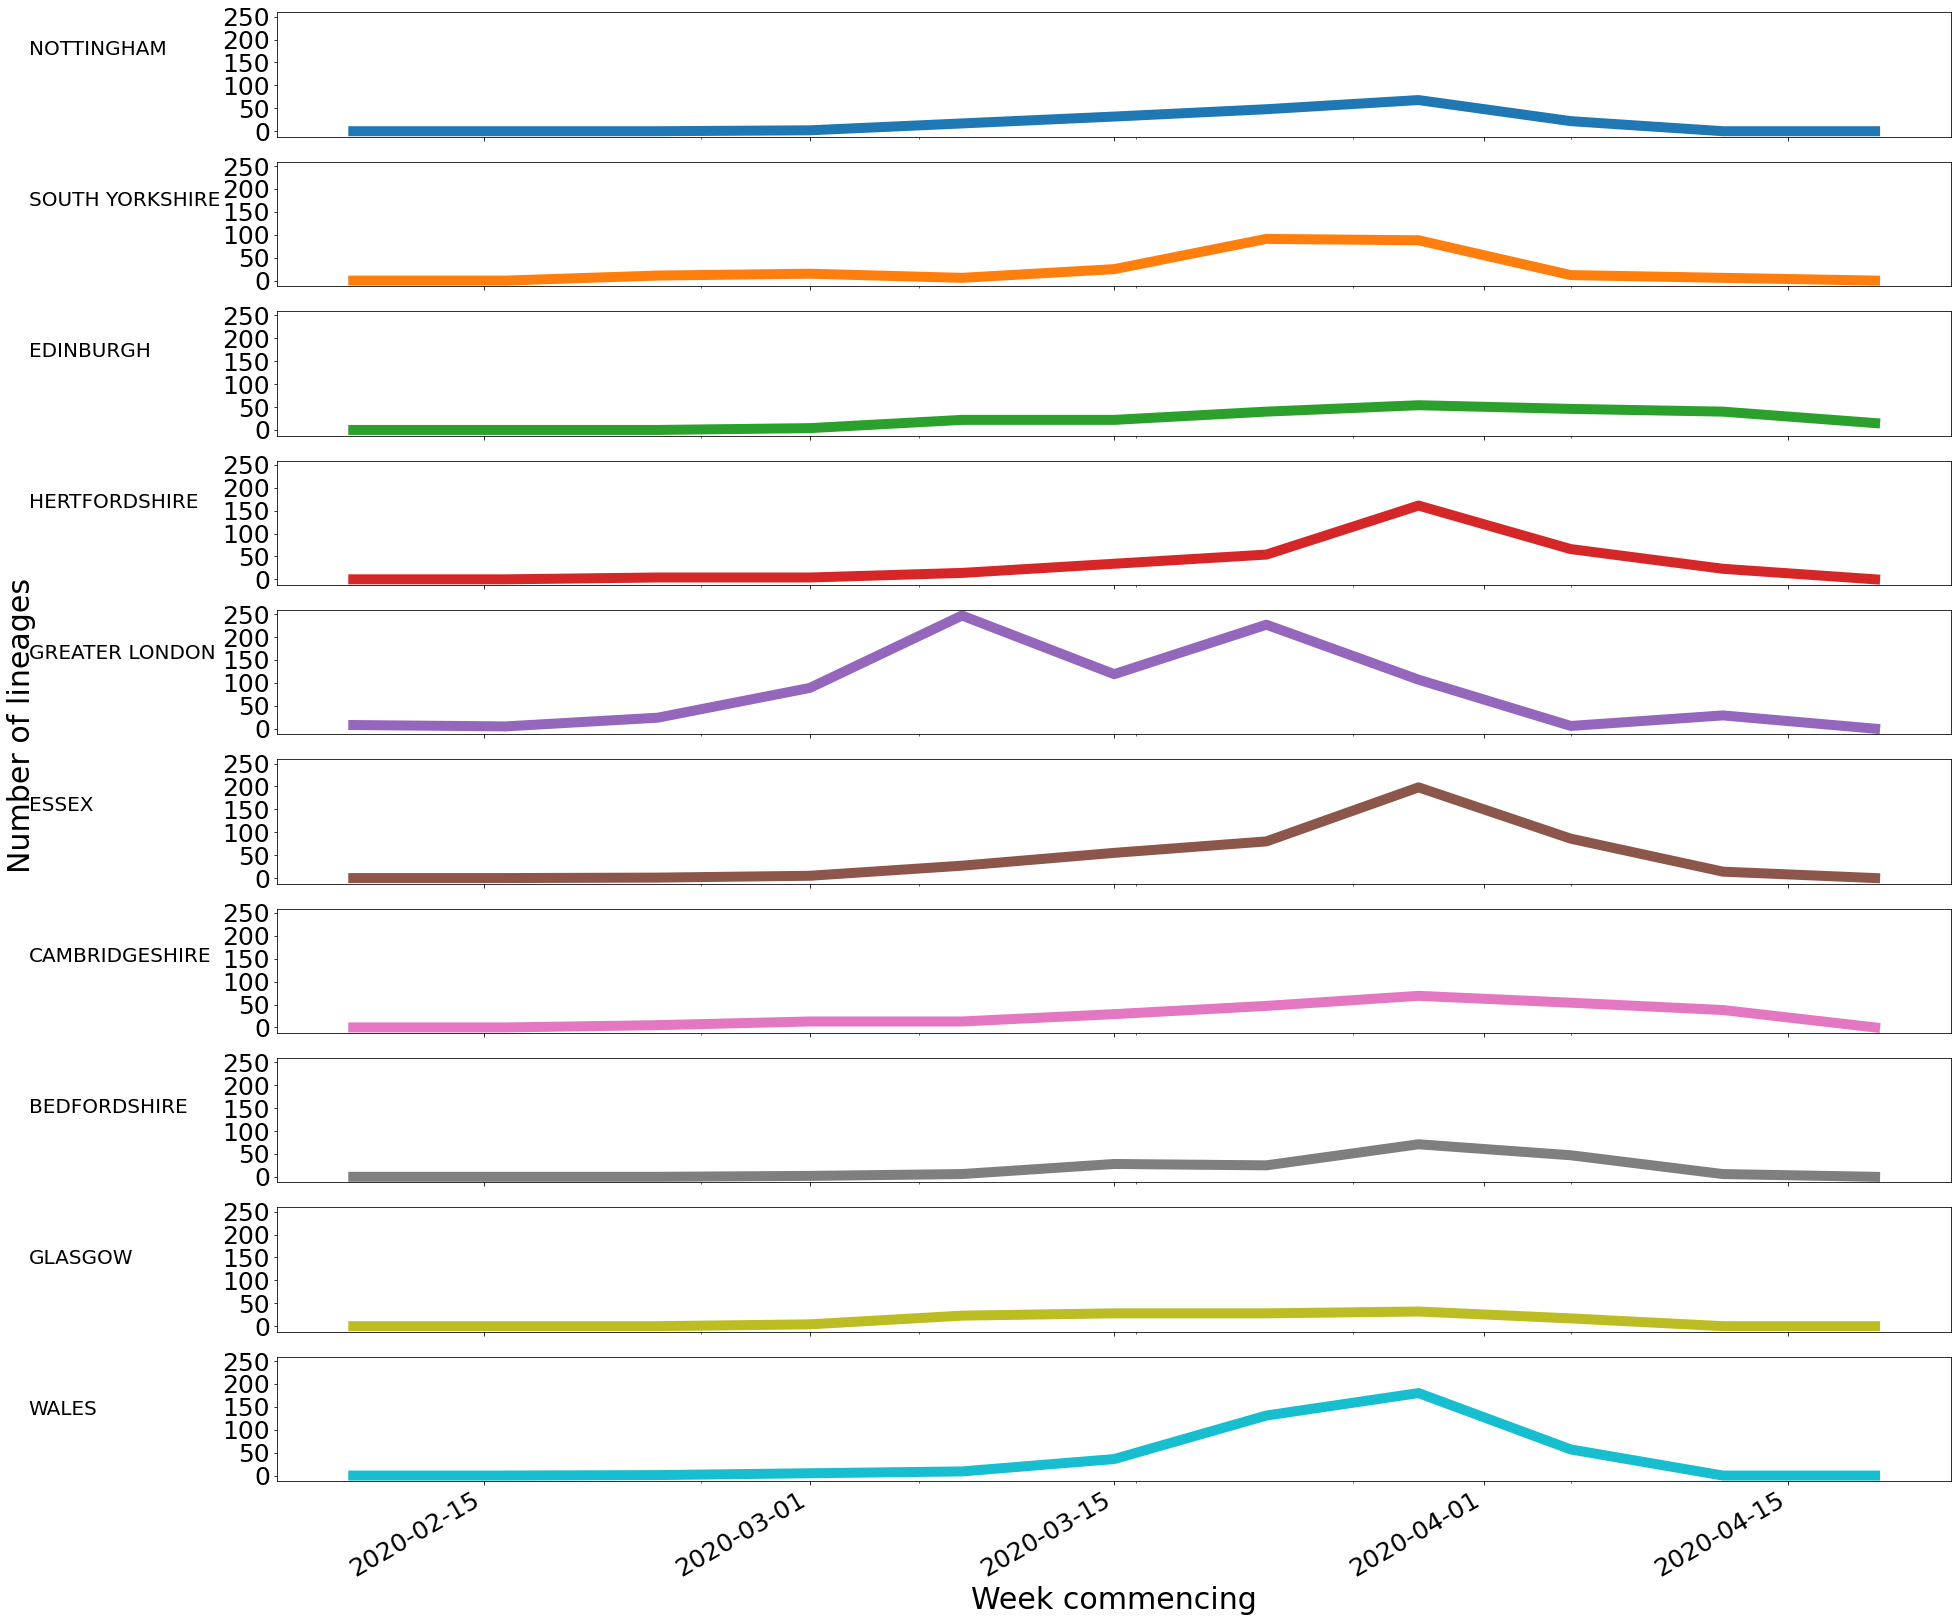

In [224]:
cols = []
for col in df.iteritems():
    if col[0] != "Week_commencing":
        cols.append(col[0])


fig, ax1 = plt.subplots(figsize=(30,30))

df.plot(x="Week_commencing", y=cols, ax=ax1, subplots=True,sharex=True, sharey=True,layout=(10,1), figsize=(30,30), fontsize=25, legend=False, linewidth=10)

plt.xlabel("Week commencing", fontsize = 30)
fig.text(0.0,0.55,"Number of lineages", va='center', rotation='vertical',fontsize=30)

ycoord = 0.863

for i in cols:
    
    fig.text(0.01,ycoord, i, va='center', fontsize=20)
    ycoord -=0.07

plt.show()

/Users/s1743989/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/s1743989/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/s1743989/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/s1743989/anaconda3/lib/py

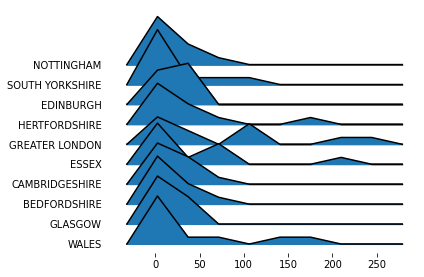

In [226]:
joypy.joyplot(df, kind="counts")
plt.show()

In [225]:
df

,Week_commencing,NOTTINGHAM,SOUTH YORKSHIRE,EDINBURGH,HERTFORDSHIRE,GREATER LONDON,ESSEX,CAMBRIDGESHIRE,BEDFORDSHIRE,GLASGOW,WALES
0,2020-02-09,0,0,0,0,8,0,0,0,0,0
1,2020-02-16,0,0,0,0,5,0,0,0,0,0
2,2020-02-23,0,11,0,4,24,1,5,0,0,1
3,2020-03-01,2,15,4,4,89,5,13,2,4,5
4,2020-03-08,17,6,22,14,247,27,13,6,23,9
5,2020-03-15,32,25,22,34,119,55,29,28,28,36
6,2020-03-22,48,91,40,54,227,80,47,25,28,131
7,2020-03-29,68,88,54,161,107,198,69,71,32,180
8,2020-04-05,22,12,46,66,6,86,54,47,17,57
9,2020-04-12,0,6,40,23,29,14,38,6,0,0
